In [47]:

import yfinance
import numpy as np
import pandas as pd
import pandas
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
import cufflinks as cf
cf.set_config_file(offline=True)

import warnings
warnings.filterwarnings("ignore")


In [48]:

from ActMng import AccountManager

In [49]:
starting_capital = 100000
allocation = 0.8

symbol = 'SPY'

long_trend_days = 12
short_trend_days = 6

In [50]:
def fetch_data(symbol:str='SPY', start_date:str='2020', end_date:str=None):
    
    if end_date is None:
        end = pandas.Timestamp.now()
    else:
        end = end_date
    
    return pdr.get_data_yahoo(symbol, pandas.Timestamp(start_date), pandas.Timestamp(end))[['Open','Close']]
df = fetch_data(symbol)
df

[*********************100%***********************]  1 of 1 completed


,Open,Close
Date,,
2019-12-31,320.529999,321.859985
2020-01-02,323.540009,324.869995
2020-01-03,321.160004,322.410004
2020-01-06,320.489990,323.640015
2020-01-07,323.019989,322.730011
...,...,...
2021-11-08,469.700012,468.929993
2021-11-09,469.320007,467.380005
2021-11-10,465.579987,463.619995


In [51]:
fast_trend = df.Open.rolling(window=short_trend_days).mean()
slow_trend = df.Open.rolling(window=long_trend_days).mean()

df['ma_fast'] = fast_trend
df['ma_slow'] = slow_trend
df[['Close','ma_fast','ma_slow']].iplot()
df = df.dropna()
df

,Open,Close,ma_fast,ma_slow
Date,,,,
2020-01-16,329.700012,330.920013,327.393341,324.670003
2020-01-17,331.700012,331.950012,328.316676,325.600838
2020-01-21,330.899994,331.299988,328.918340,326.214170
2020-01-22,332.239990,331.339996,329.893336,327.137502
2020-01-23,330.630005,331.720001,330.420003,327.982503
...,...,...,...,...
2021-11-08,469.700012,468.929993,464.359996,459.879166
2021-11-09,469.320007,467.380005,465.863332,461.228333
2021-11-10,465.579987,463.619995,466.756663,462.169998


In [52]:
df['trade_direction'] = np.sign(fast_trend-slow_trend)
df = df.dropna()
df

,Open,Close,ma_fast,ma_slow,trade_direction
Date,,,,,
2020-01-16,329.700012,330.920013,327.393341,324.670003,1.0
2020-01-17,331.700012,331.950012,328.316676,325.600838,1.0
2020-01-21,330.899994,331.299988,328.918340,326.214170,1.0
2020-01-22,332.239990,331.339996,329.893336,327.137502,1.0
2020-01-23,330.630005,331.720001,330.420003,327.982503,1.0
...,...,...,...,...,...
2021-11-08,469.700012,468.929993,464.359996,459.879166,1.0
2021-11-09,469.320007,467.380005,465.863332,461.228333,1.0
2021-11-10,465.579987,463.619995,466.756663,462.169998,1.0


In [53]:
#Determine the direction of the moving average differences
df_trades = df['trade_direction'].dropna().diff().dropna().apply(np.sign).astype('int8')
df_trades = pandas.DataFrame(df_trades[df_trades !=0])

#Label our intended trades
df_trades['trade'] = df['trade_direction'].map({1:'Long',-1:'Short'})
df['trades'] = df_trades['trade']
df = df.dropna()
df

,Open,Close,ma_fast,ma_slow,trade_direction,trades
Date,,,,,,
2020-01-29,328.380005,326.619995,328.630000,328.774170,-1.0,Short
2020-02-07,332.820007,332.200012,329.570002,328.443334,1.0,Long
2020-02-25,323.940002,312.649994,332.431671,333.750003,-1.0,Short
2020-03-31,260.559998,257.750000,249.723333,244.231665,1.0,Long
2020-05-08,291.089996,292.440002,286.595001,286.680832,-1.0,Short
2020-05-12,293.790009,286.670013,289.608337,288.589999,1.0,Long
2020-05-20,295.820007,296.929993,288.433334,289.020836,-1.0,Short
2020-05-21,296.790009,294.880005,290.221670,289.866669,1.0,Long
2020-06-17,314.070007,311.660004,311.448334,312.861664,-1.0,Short


In [54]:
#Label our opening trade after removing our window period
df['trades'].replace(pandas.np.NaN,'None',inplace=True)
df = df.dropna()
df['trades'].iloc[0]=('Long' if df['trade_direction'].iloc[0]==1.0 else 'Short')
df

,Open,Close,ma_fast,ma_slow,trade_direction,trades
Date,,,,,,
2020-01-29,328.380005,326.619995,328.630000,328.774170,-1.0,Short
2020-02-07,332.820007,332.200012,329.570002,328.443334,1.0,Long
2020-02-25,323.940002,312.649994,332.431671,333.750003,-1.0,Short
2020-03-31,260.559998,257.750000,249.723333,244.231665,1.0,Long
2020-05-08,291.089996,292.440002,286.595001,286.680832,-1.0,Short
2020-05-12,293.790009,286.670013,289.608337,288.589999,1.0,Long
2020-05-20,295.820007,296.929993,288.433334,289.020836,-1.0,Short
2020-05-21,296.790009,294.880005,290.221670,289.866669,1.0,Long
2020-06-17,314.070007,311.660004,311.448334,312.861664,-1.0,Short


In [55]:
# Our trading strategy implementation - feel free to brose ActMng.py if you are curious.
trading_strategy = AccountManager(symbol=symbol,trades_df=df,starting_capital=starting_capital,allocation_amount=allocation)
results = trading_strategy.run()

In [56]:
#Here we can see a day by day breakdown of the account
results['result_df']

,Open,Close,ma_fast,ma_slow,trade_direction,trades,account_val,cash_bal,position,position_changes,fees
2020-01-29,328.380005,326.619995,328.630000,328.774170,-1.0,Short,100427.773579,179998.936790,-243.62,-243.62,1.0
2020-02-07,332.820007,332.200012,329.570002,328.443334,1.0,Long,98767.910366,19780.713464,237.77,481.39,2.0
2020-02-25,323.940002,312.649994,332.431671,333.750003,-1.0,Short,99500.917287,174243.024828,-239.06,-476.83,2.0
2020-03-31,260.559998,257.750000,249.723333,244.231665,1.0,Long,110985.671351,22389.263851,343.73,582.79,2.0
2020-05-08,291.089996,292.440002,286.595001,286.680832,-1.0,Short,121989.337738,220398.322960,-336.51,-680.24,2.0
2020-05-12,293.790009,286.670013,289.608337,288.589999,1.0,Long,119176.756000,24306.181756,330.94,667.45,2.0
2020-05-20,295.820007,296.929993,288.433334,289.020836,-1.0,Short,121836.027021,219965.451001,-330.48,-661.42,2.0
2020-05-21,296.790009,294.880005,290.221670,289.866669,1.0,Long,121252.795474,24375.867469,328.53,659.01,2.0
2020-06-17,314.070007,311.660004,311.448334,312.861664,-1.0,Short,128338.321266,229599.773055,-324.91,-653.44,2.0
2020-07-07,315.380005,313.779999,310.159999,309.673332,1.0,Long,126611.685701,25423.911694,322.48,647.39,2.0


In [57]:
# Here are our simulated orders as we would submit to an API endpoint for algorthmic trading. 
results['broker_orders']

,symbol,date,time,order,order_type,price,size,exchange_fees
2020-01-29,SPY,2020-01-29 00:00:00,At Market Open,SELL,MARKET,328.380005,243.62,1.0
2020-02-07,SPY,2020-02-07 00:00:00,At Market Open,BUY,MARKET,332.820007,243.62,1.0
2020-02-07,SPY,2020-02-07 00:00:00,At Market Open,BUY,MARKET,332.820007,237.77,1.0
2020-02-25,SPY,2020-02-25 00:00:00,At Market Open,SELL,MARKET,323.940002,237.77,1.0
2020-02-25,SPY,2020-02-25 00:00:00,At Market Open,SELL,MARKET,323.940002,239.06,1.0
...,...,...,...,...,...,...,...,...
2021-09-14,SPY,2021-09-14 00:00:00,At Market Open,SELL,MARKET,448.119995,224.58,1.0
2021-09-14,SPY,2021-09-14 00:00:00,At Market Open,SELL,MARKET,448.119995,224.63,1.0
2021-10-13,SPY,2021-10-13 00:00:00,At Market Open,BUY,MARKET,434.709991,224.63,1.0
2021-10-13,SPY,2021-10-13 00:00:00,At Market Open,BUY,MARKET,434.709991,237.10,1.0


0.289449363479614
17.167658465106427
4.003952067148254


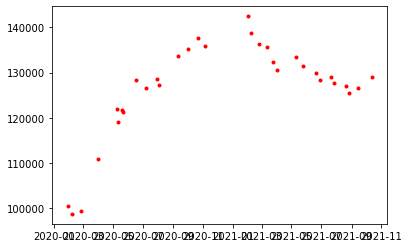

In [58]:
#Todo:
# Calculate the Absolute Return of our trend-following trading strategy
rdf = results['result_df']
final_value= rdf.account_val.iloc[-1]
initial_value = starting_capital
absolute_return_tf = (final_value-initial_value) / initial_value
print(absolute_return_tf)


# Calculate the CAGR or our trend-following trading strategy
CAGR_tf = ((final_value/initial_value)**(365/len(rdf)))-1
print(CAGR_tf)
# Calculate the IR (Sharpe without RF-rate) of our trend-following trading strategy
information_ratio_tf = (rdf.account_val.pct_change().dropna().mean()/rdf.account_val.pct_change().dropna().std())*(252**0.5)
print(information_ratio_tf)
#Plot the equity curve (hint: use 'account_val')
import matplotlib.pyplot as plt
plt.plot(rdf.account_val, 'o', markersize = 3, color = 'red') 
plt.show()

In [59]:


#Todo:
# Calculate the Absolute Return of a buy-and-hold strategy in the same period
final_value= rdf.Close.iloc[-1]
initial_value = rdf.Open.iloc[0]
absolute_return_bh = (final_value-initial_value) / initial_value
print(absolute_return_bh)
# Calculate the CAGR or a buy-and-hold trading strategy
CAGR_tf = ((final_value/initial_value)**(252/len(df)))-1
print(CAGR_tf)
# Calculate the IR (Sharpe without RF-rate) of a buy-and-hold trading strategy
information_ratio_tf = (rdf.Close.pct_change().dropna().mean()/rdf.Close.pct_change().dropna().std())*(252**0.5)
print(information_ratio_tf)

#Plot the equity curve (hint: use 'close' returns and your initial capital value to generate an equity curve)
((rdf.Close.pct_change().dropna()+1).cumprod()*starting_capital).iplot()


0.3252329198030251
8.18440861917324
3.48553529498239


In [45]:
#Todo - optional, below:
# Copy any of the code from above to new cells below, and see how changing the symbol, dates and trend parameters changes the performance
# Can you beat the reference implementation?